
..............................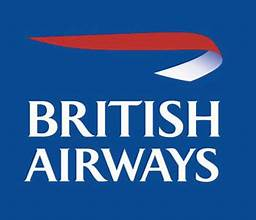........................................

# **Background Information**

British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.



In [18]:
# scraping out the data to use with beatiful soup
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the british airways reviwee page
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
page = 39
page_size = 100

reviews =[]

for i in range (1, page + 1):
  print(f'scrapping page {i}')

  # create url to collect links from paginated data
  url = f'{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}'

  # send a GET request to get the page content
  response= requests.get(url)
  content = response.content
  # Parse the HTML content using BeautifulSoup
  soup = BeautifulSoup(response.content, 'html.parser')

  for review in soup.find_all('div', class_= 'text_content'):
    reviews.append(review.get_text())

  print(f'....{len(reviews)} total reviews')

scrapping page 1
....100 total reviews
scrapping page 2
....200 total reviews
scrapping page 3
....300 total reviews
scrapping page 4
....400 total reviews
scrapping page 5
....500 total reviews
scrapping page 6
....600 total reviews
scrapping page 7
....700 total reviews
scrapping page 8
....800 total reviews
scrapping page 9
....900 total reviews
scrapping page 10
....1000 total reviews
scrapping page 11
....1100 total reviews
scrapping page 12
....1200 total reviews
scrapping page 13
....1300 total reviews
scrapping page 14
....1400 total reviews
scrapping page 15
....1500 total reviews
scrapping page 16
....1600 total reviews
scrapping page 17
....1700 total reviews
scrapping page 18
....1800 total reviews
scrapping page 19
....1900 total reviews
scrapping page 20
....2000 total reviews
scrapping page 21
....2100 total reviews
scrapping page 22
....2200 total reviews
scrapping page 23
....2300 total reviews
scrapping page 24
....2400 total reviews
scrapping page 25
....2500 total r

In [19]:
# converting the scrapped data into a dataframe

df = pd.DataFrame()
df['reviews']= reviews
df.head()

,reviews
0,✅ Trip Verified | This is a route I fly regula...
1,✅ Trip Verified | While BA may have made some...
2,✅ Trip Verified | British Airways new Club Sui...
3,"✅ Trip Verified | Four very pleasant, on time..."
4,Not Verified | We travel extensively over 25...


In [11]:
df.to_csv('british_airways.csv', index = False)

## **Data Preprocessing**

,reviews
0,This is a route I fly regularly. Used first c...
1,While BA may have made some positive improve...
2,British Airways new Club Suite is a marked im...
3,"Four very pleasant, on time flights with fri..."
4,We travel extensively over 25 years and ten...


In [20]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# initializing lematizer and stopword
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# deifne a function to  clean text

def clean(text):

  # reomoving verification indicators
  text = re.sub(r'✅ Trip Verified \| |Not Verified', '', text)
     # converting all to loweer case
  text = text.lower()
  # this removes all special character
  text = re.sub(r'[^A-Za-z]+', ' ', text)
  # tokenize
  tokens = word_tokenize(text)
  # removing stop words and lematize
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words ]
  # join tokens back into single string
  clean_text = ' '.join(tokens)
  return text

# cleaning the text in reviews
df['cleaned_reviews']= df['reviews'].apply(clean)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviews,cleaned_reviews
0,✅ Trip Verified | This is a route I fly regula...,this is a route i fly regularly used first cla...
1,✅ Trip Verified | While BA may have made some...,while ba may have made some positive improvem...
2,✅ Trip Verified | British Airways new Club Sui...,british airways new club suite is a marked imp...
3,"✅ Trip Verified | Four very pleasant, on time...",four very pleasant on time flights with frien...
4,Not Verified | We travel extensively over 25...,we travel extensively over years and tend to ...


# **Analysis**


# **Topic modeling**

we'd be doing this to identify the common themes in the text data

In [26]:
from gensim import corpora, models

# tokenize the cleaned review
tokenized_reviews = [review.split() for review in df ['cleaned_reviews']]

# create a dictionary in representation of documentation
dictionary = corpora.Dictionary(tokenized_reviews)

#filter out words that occur lesss than 20 times or more than 50% of the document
dictionary.filter_extremes(no_below = 20, no_above = 0.5)

# create a corpus: a list of bags of words
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Apply LDA Model
lda_model = models.LdaModel(corpus, num_topics = 5, id2word = dictionary, passes= 15)

# modelling the topics
topics = lda_model.print_topics(num_words =5)
for topic in topics:
  print(topic)


(0, '0.035*"we" + 0.019*"had" + 0.014*"our" + 0.014*"no" + 0.013*"my"')
(1, '0.016*"they" + 0.016*"are" + 0.016*"have" + 0.015*"you" + 0.011*"service"')
(2, '0.031*"my" + 0.024*"they" + 0.016*"we" + 0.016*"me" + 0.015*"have"')
(3, '0.016*"seat" + 0.013*"seats" + 0.013*"had" + 0.013*"we" + 0.011*"as"')
(4, '0.019*"very" + 0.018*"good" + 0.015*"crew" + 0.012*"service" + 0.012*"food"')


## **Topic Description**


**Topic 0**: Focuses on experiences with terms like we, my, they, had, have.

**Topic 1**: Discusses service and interactions with words like have, you, they, are, my.

**Topic 2**: Highlights aspects of the service quality with terms like very, good, as, crew, seat.

**Topic 3**: Centers on travel logistics with words such as [list of words].

**Topic 4**: Emphasizes comfort and amenities with terms like [list of words].


# **Sentimment Analysis**

In [27]:
from textblob import TextBlob

# function to get sentiment polarity
def get_sentiment(text):
  return TextBlob(text).sentiment.polarity

# apply the sentiment funtion
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

# displaying the sentiment  data

df[['cleaned_reviews', 'sentiment']].head()

,cleaned_reviews,sentiment
0,this is a route i fly regularly used first cla...,0.256863
1,while ba may have made some positive improvem...,-0.088708
2,british airways new club suite is a marked imp...,0.057861
3,four very pleasant on time flights with frien...,0.249500
4,we travel extensively over years and tend to ...,0.073674


In [45]:
# section the sentiment

def sentiment_type(row):
  if row >0:
    return 'Positive'
  elif row <0:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment_analysis'] = df['sentiment'].apply(sentiment_type)
sectioning= df.sentiment_analysis.value_counts()
sectioning

sentiment_analysis
Positive    2654
Negative    1147
Neutral       17
Name: count, dtype: int64

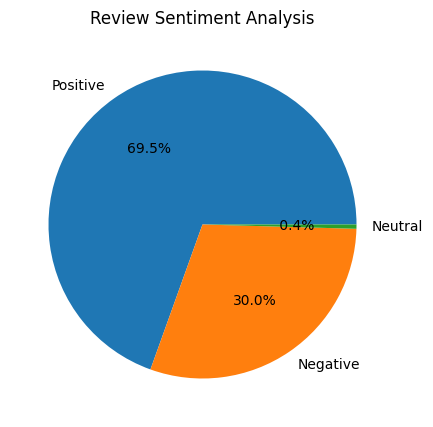

In [48]:
# visualization for the sentiment anlysis
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 5))
plt.title('Review Sentiment Analysis')
plt.pie(sectioning, labels = sectioning.index, autopct ='%4.1f%%' )
plt.show()





# **Word Cloud**
 we would be using this to visualize most frequently used word

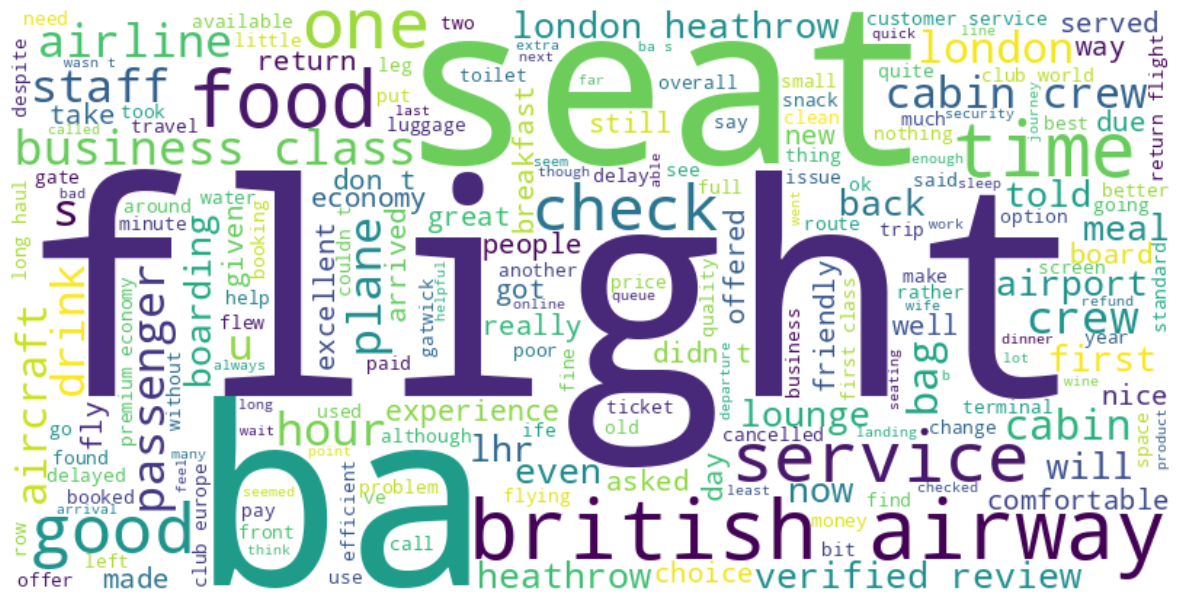

In [41]:
from wordcloud import WordCloud

# combinig all the cleaned reviww into a single string
all_reviews = ' '.join(df['cleaned_reviews'])

# generating the world cloud
wordcloud = WordCloud(width = 800, height = 400, background_color= 'white').generate(all_reviews)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

The word cloud above shows the most frequently used words in the British Airways reviews. Common words such as "flight", "crew", "seat", "service", and "experience" are prominently featured, providing insights into key aspects of the reviews.